# Creating Satellite Object

In [1]:
# Import Satellite Object
from hypso import Satellite

# Define HYPSO Image Directory
hypso_dir = r"/Users/alvaroflores/Documents/florida_2023-01-07_1524Z"
# hypso_dir = r"D:\4th Semester\Code\Datasets\Bundles\Bundle2\florida_2023-01-07_1524Z"
hypso_dir = r"/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z"

# Create Satellite Object
satobj = Satellite(hypso_dir)

Processing *wide* Image with Dimensions: (598, 1092)
Doing manual coordinate correction with .points file
Hypso Source
    uncorrectedHypsoLon uncorrectedHypsoLat
0            10.076605           59.801971
1             9.947275           59.661048
2             10.10658           59.526705
3            10.329505           59.756197
4            10.380956           59.959049
5             9.654835            60.01048
6            10.005274           60.607818
7            10.727707           60.802114
8            10.400754           60.904713
9            10.429935           60.964835
10           10.153709           61.127709
11           11.523019           62.191321
12           11.633964           62.255133
13           11.427097           62.254831
Hypso Destination
     transformed_mapLon  transformed_mapLat
0            10.366577           59.716311
1            10.241021           59.569467
2            10.386577           59.438368
3            10.595467           59.668931
4

# Overlay RGB on Map

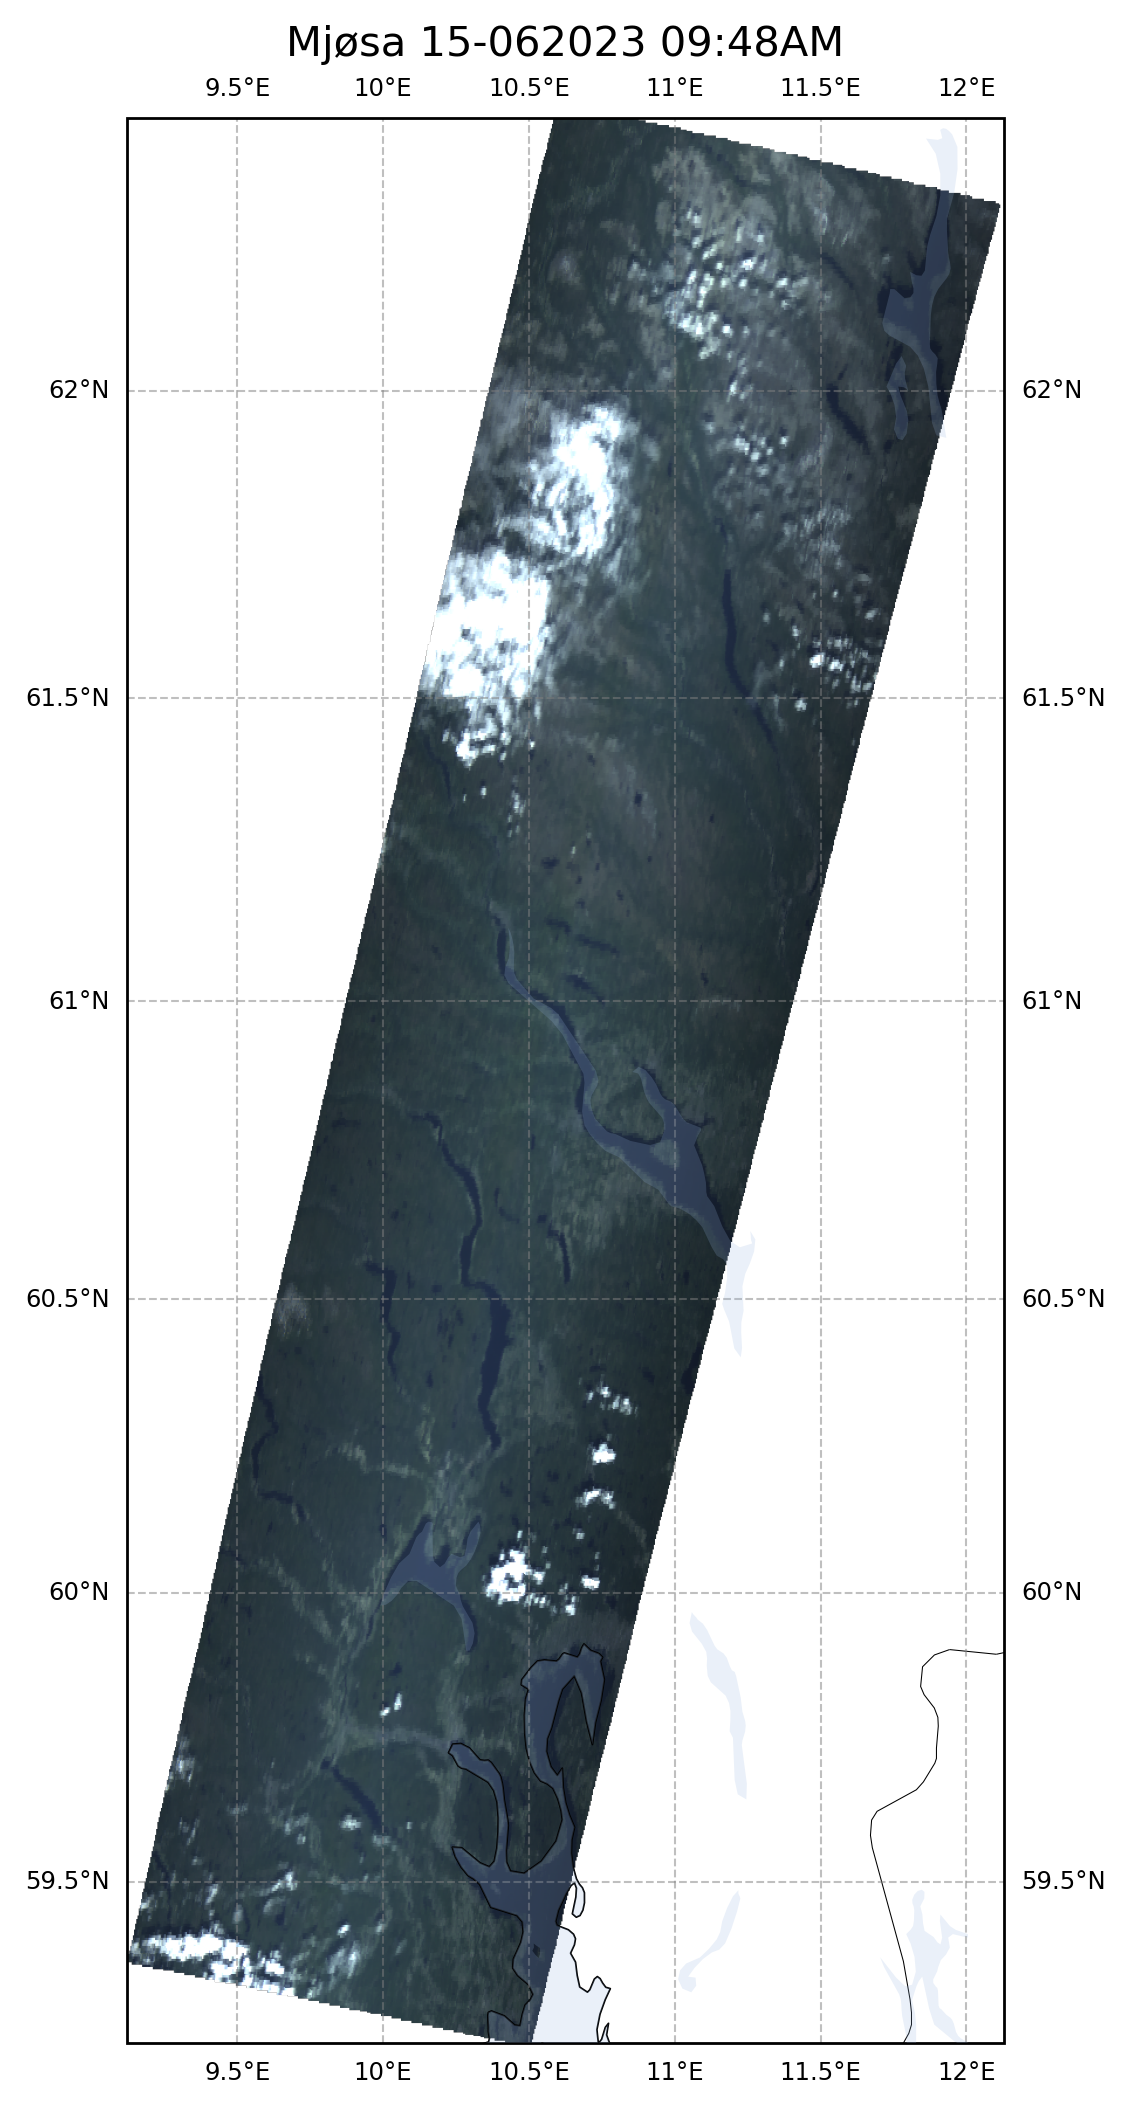

In [2]:
# Import Functions
from hypso.plot import show_rgb_map

# Show Map
show_rgb_map(satobj, plotTitle="Mjøsa 15-062023 09:48AM",dpi_input=250)

## Plot 2D Array on Map

2D Array Plot Range:  [0.01, 100]


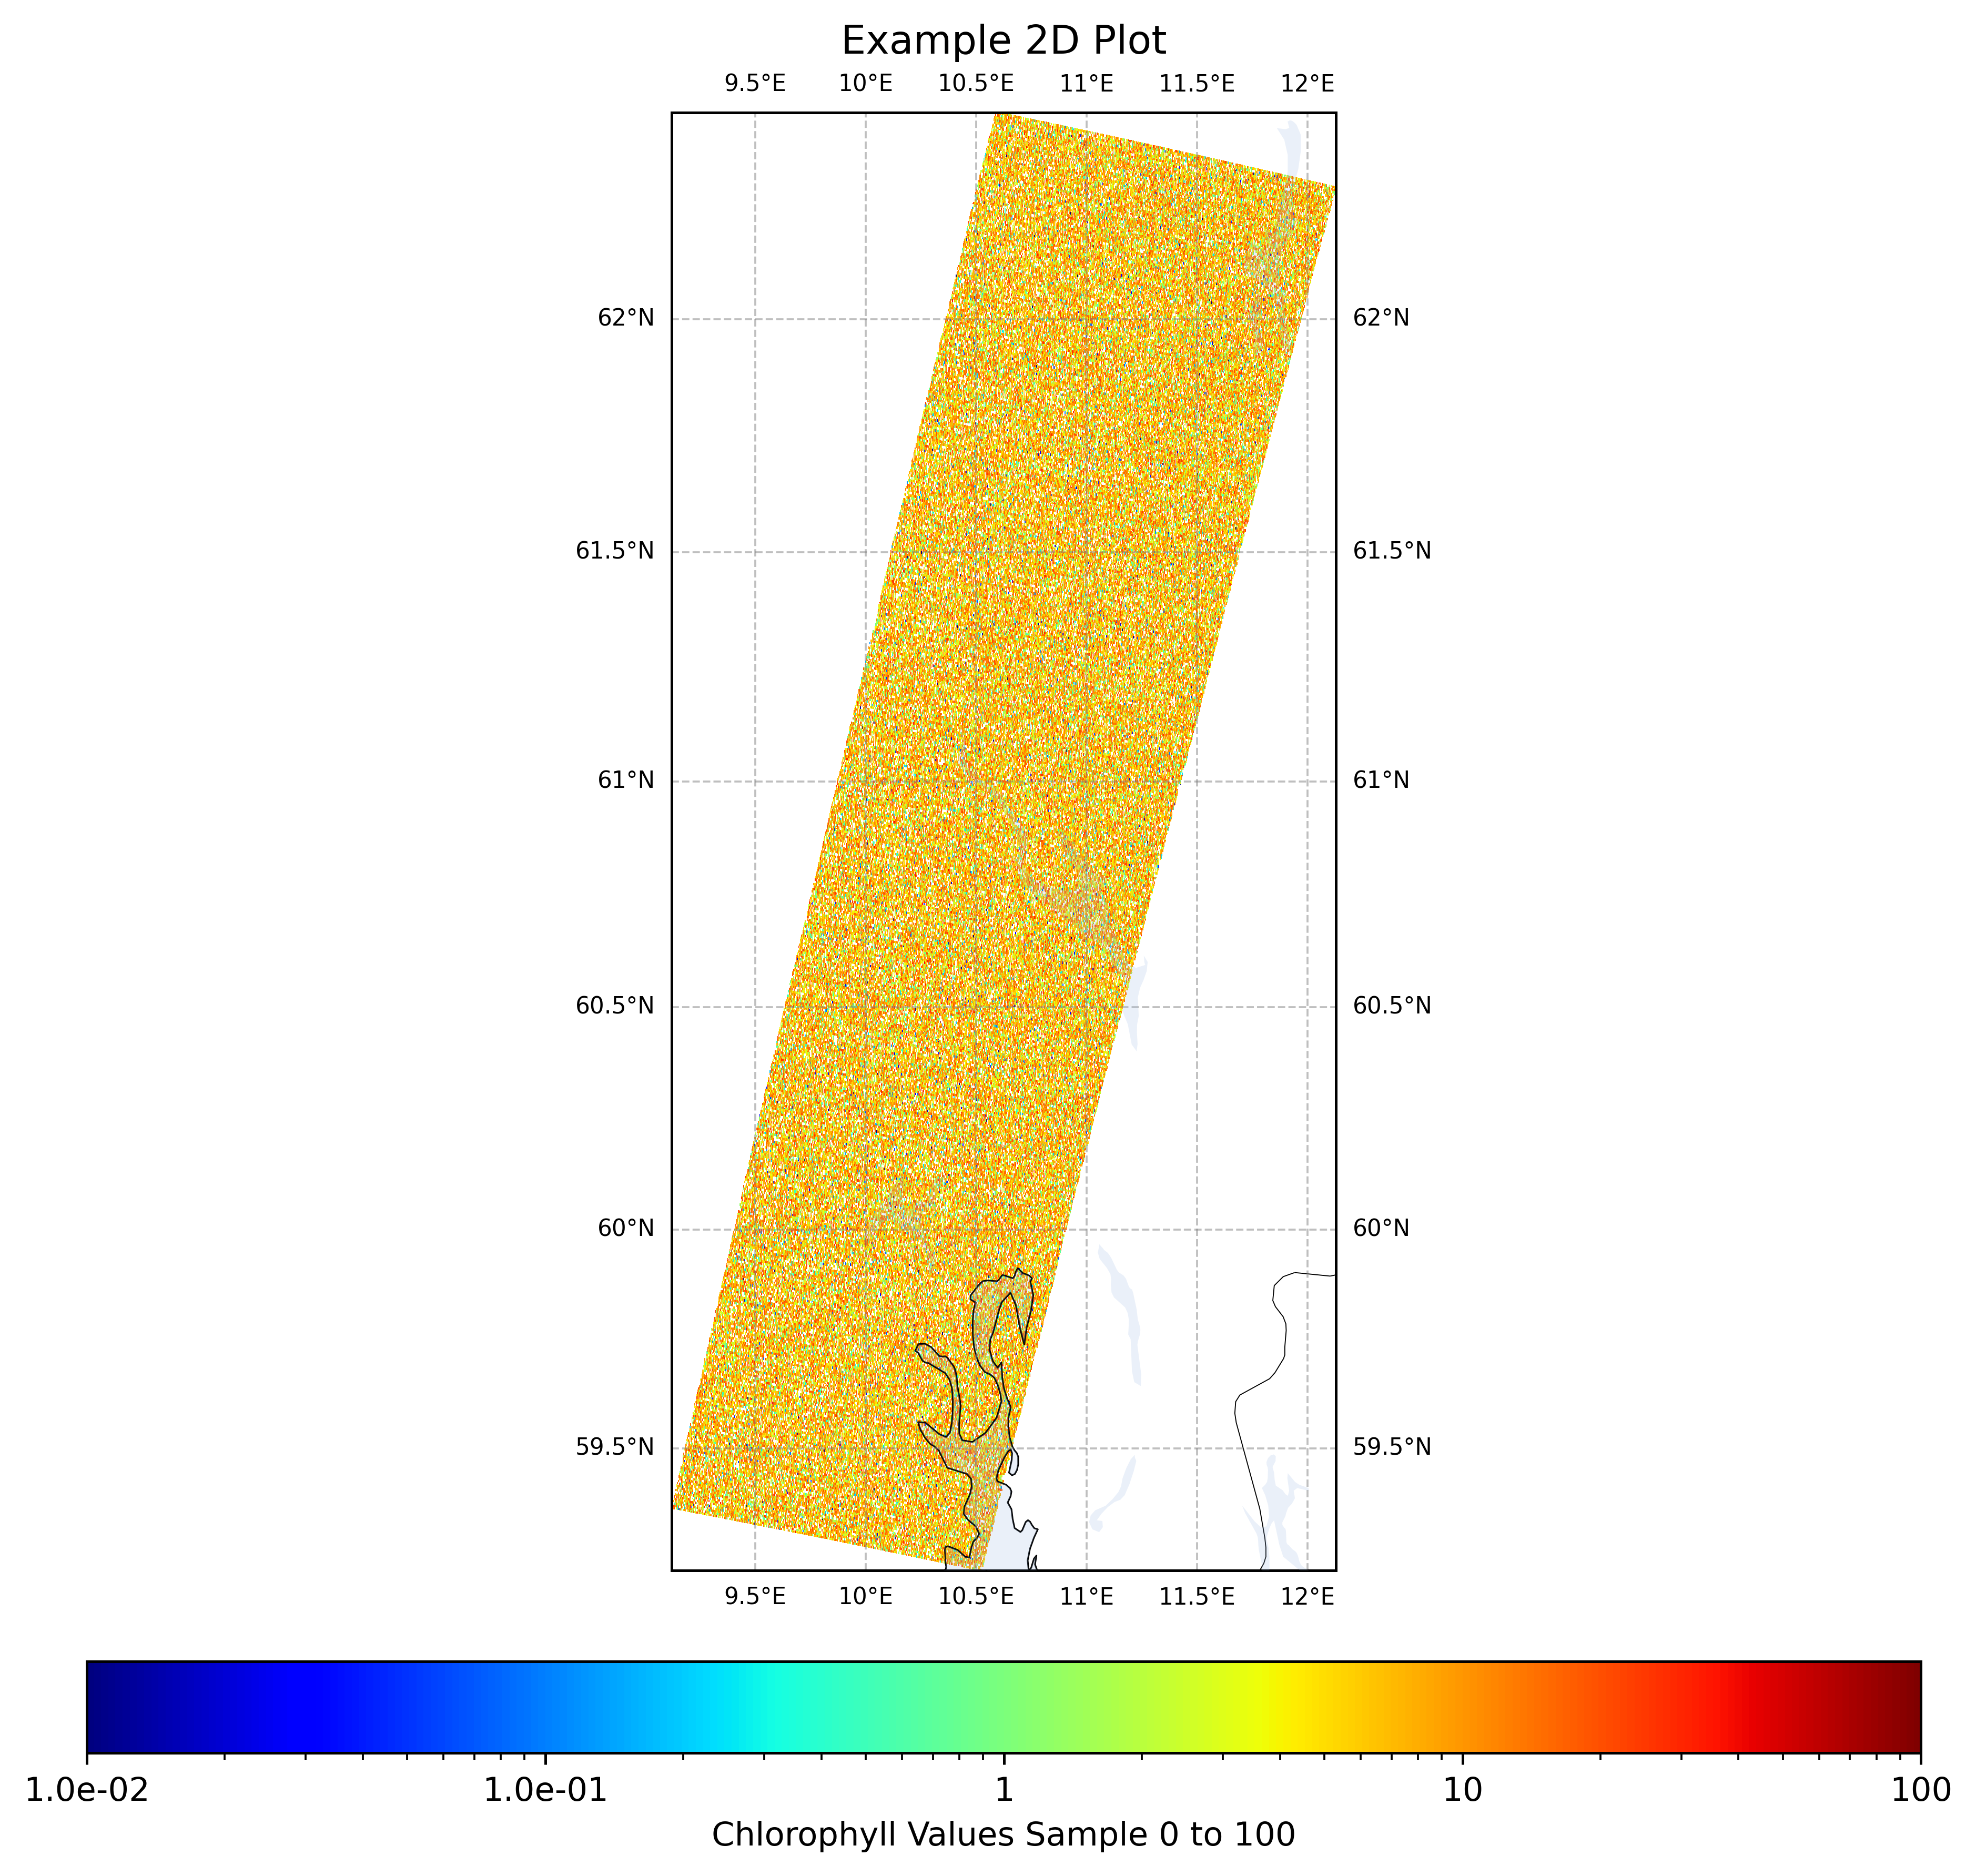

In [3]:
# Create Random Array of Chlorophyll Values
import numpy as np
chl_array = np.random.normal(1, 10, size=satobj.spatialDim)


from hypso.plot import plot_array_overlay
# Plot Array on Map
plot_array_overlay(satobj,chl_array, plotTitle="Example 2D Plot",cbar_title="Chlorophyll Values Sample 0 to 100", min_value=0.01,max_value=100)

## Export RGB to .png

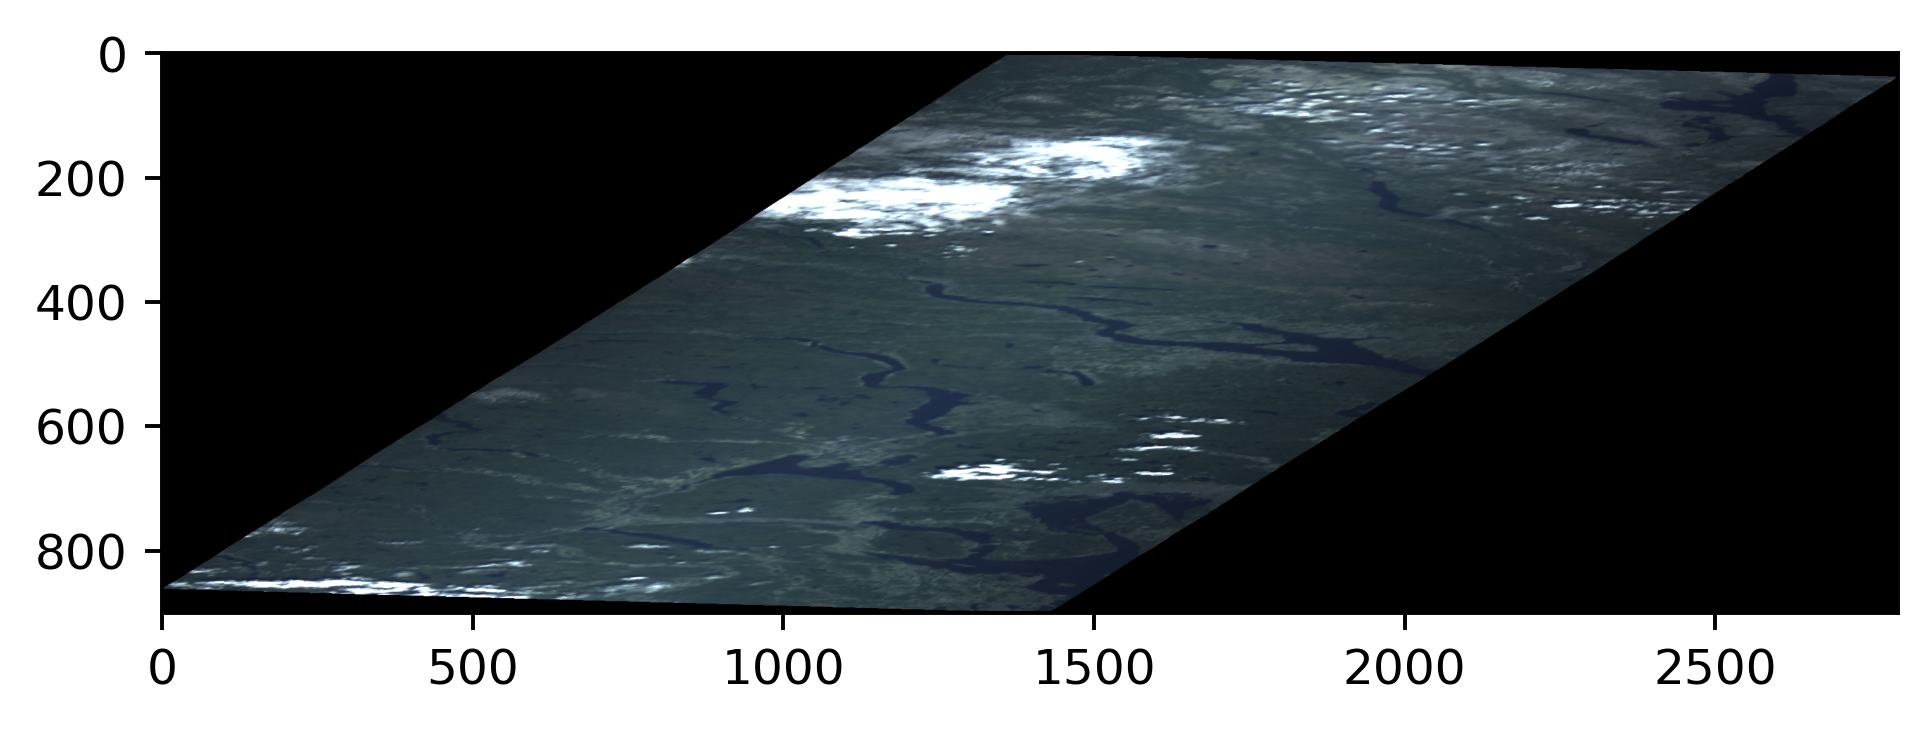

In [4]:
from hypso.plot import write_rgb_to_png

# Export Georeferenced RGB to png
write_rgb_to_png(satobj,path_to_save=r"/Users/alvaroflores/Desktop/image_demo.png")

## Estimate Water Mask

L2 Atmospheric Correction Cube Not Found. L1B will be used


-------  Naive-Bayes Water Mask Detector  ----------
Loading configuration file /Users/alvaroflores/Documents/Research Assitant/hypso-package/hypso/classification/WaterDetect/WaterDetect.ini
File /Users/alvaroflores/Documents/Research Assitant/hypso-package/hypso/classification/WaterDetect/WaterDetect.ini verified.
[['ndwi', 'Nir'], ['otsu', 'ndwi']]
maxndwi
Selection of best number of clusters using Calinski-Harabasz Index:
k=2 :Calinski_harabaz index=5885.514348783551
k=3 :Calinski_harabaz index=18509.74335903002
k=4 :Calinski_harabaz index=17972.60457926869
k=5 :Calinski_harabaz index=13709.64614931001
k=6 :Calinski_harabaz index=28466.715648270372
k=7 :Calinski_harabaz index=25082.80128208032
Applying clusters based naive bayes classifier
Assgnin 1 to cluster_id 5
Skipping cluster_id 5


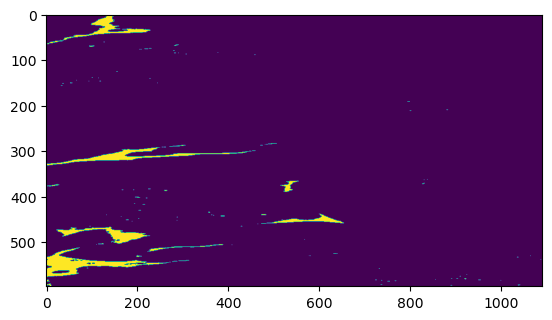

In [5]:
from hypso.classification import ndwi_watermask

# Calculate Water Mask With Binary Values
ndwi_watermask(satobj)

# Show Water Mask
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(satobj.waterMask)
plt.show()

## Get Spectra L1C From Coordinate

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (60.7776, 11.0895) -→ (864, 438)


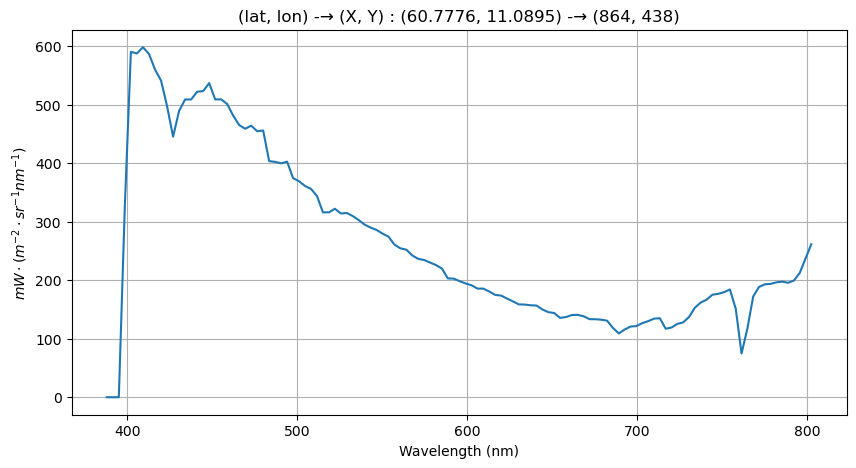

lat      lon    X    Y  wl387_85  wl391_4  wl394_96    wl398_51  \
0  60.7776  11.0895  864  438       0.0      0.0       0.0  327.395004   

     wl402_07    wl405_62  ...    wl771_76    wl775_18     wl778_6  \
0  590.386537  587.678425  ...  188.595806  193.023956  193.773106   

     wl782_02    wl785_44    wl788_86    wl792_28    wl795_69    wl799_11  \
0  196.441572  197.603349  195.626965  199.445941  212.211005  236.794984   

     wl802_52  
0  261.454326  

[1 rows x 124 columns]

In [6]:
# From satellite object get Spectra from Location or Pixel
# These two examples are equivalent for "coord" and "pix"

spectra1 = satobj.get_spectra([60.7776,11.0895],postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra1.csv", plot=True) # Mjosa Sandvika
# spectra1 = satobj.get_spectra([864,438],postype="pix",filename=r"/Users/alvaroflores/Desktop/spectra1.csv", plot=True) # Mjosa Sandvika
spectra1.head()

# spectra2 = satobj.get_spectra([60.6423, 11.1214],postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra2.csv") # Mjosa Skreia
# spectra3 = satobj.get_spectra([60.7783,11.0891],postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra3.csv") # Mjosa Sandvika

## Export 2D Array (Single Channel) to GeoTiff

In [7]:
from hypso.georeference import array_to_geotiff

# Exporting water mask as GeoTiff to folder with "geotiff_ful"" inside the hypso_dir 
array_to_geotiff(satobj, satobj.waterMask, file_name="water_mask_export")

  Projecting pixel geodetic to map ...
    [59.218143, 62.437134, 9.122029, 12.129085]
    using UTM map: WGS 84 / UTM zone 32N EPSG: 32632
  Grid points inside bounding polygon ...
    Points inside boundary: 1284705 / 2493067
  Registration, aka rectification, aka resampling, aka gridding ...
      Starting band 0
      Done with band 0


## Export SatObject as .nc 

In [8]:
from hypso.exportfiles import write_NetCDF4

# Export as a .nc file the 
write_NetCDF4(satobj, path_to_save=r"/Users/alvaroflores/Desktop/demo.nc")

{'top_folder_name': '/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z', 'folder_name': 'mjosa_2023-06-15_0948Z', 'flags': '0x00000201', 'camera_ID': 2, 'frame_count': 598, 'exposure': 19.9921, 'fps': 12, 'row_count': 1092, 'column_count': 1080, 'sample_divisor': 1, 'bin_factor': 9, 'aoi_x': 428, 'aoi_y': 266, 'gain': 0, 'temp_log_period_ms': 10000, 'unixtime': 1686822499, 'iso_time': '2023-06-15T09:48:19', 'solar_zenith_angle': 40.75741, 'solar_azimuth_angle': 147.08437, 'sat_zenith_angle': 23.17196, 'sat_azimuth_angle': 102.26196, 'background_value': 72, 'x_start': 428, 'x_stop': 1508, 'y_start': 266, 'y_stop': 1358, 'exp': 0.019992100000000002, 'image_height': 1092, 'image_width': 120, 'im_size': 131040, 'capture_type': 'wide', 'latc': 60.91433, 'lonc': 10.28206, 'lat': array([[62.278732, 62.278877, 62.279022, ..., 62.43684 , 62.43699 ,
        62.437134],
       [62.273567, 62.273712, 62.273857, ..., 62.43165 , 62.431793,
        62.43194 ],
       [62.268394, 62.26854 , 62.2686

## Print Contents of .nc file

In [9]:
from hypso.exportfiles import print_nc

# Print Attributes and Groups of .nc file generated
print_nc(r"/Users/alvaroflores/Desktop/demo.nc")

--- GROUP: "/" ---
DIMENSIONS: frames, lines, bands, 
VARIABLES: 
ATTRIBUTES: instrument, institution, resolution, location_description, license, naming_authority, date_processed, date_aquired, publisher_name, publisher_url, processing_level, radiometric_file, smile_file, destriping_file, spectral_file, 
SUB-GROUPS: navigation, products, scan_line_attributes, metadata, 

  --- GROUP: "/navigation" ---
  DIMENSIONS: 
  VARIABLES: unixtime, sensor_zenith, sensor_azimuth, solar_zenith, solar_azimuth, latitude, longitude, 
  ATTRIBUTES: iso8601time, 
  SUB-GROUPS: 

  --- GROUP: "/products" ---
  DIMENSIONS: 
  VARIABLES: Lt, 
  ATTRIBUTES: 
  SUB-GROUPS: 

  --- GROUP: "/scan_line_attributes" ---
  DIMENSIONS: 
  VARIABLES: scan_quality_flags, 
  ATTRIBUTES: 
  SUB-GROUPS: 

  --- GROUP: "/metadata" ---
  DIMENSIONS: 
  VARIABLES: 
  ATTRIBUTES: 
  SUB-GROUPS: FGDC, HYPSO, 

    --- GROUP: "/metadata/FGDC" ---
    DIMENSIONS: 
    VARIABLES: 
    ATTRIBUTES: 
    SUB-GROUPS: Indentificati

## === Use Case: Compare L1B and L1C on the same location ===

Min Lat:  59.218143
Max Lat:  62.437134
Min Lon:  9.122029
Max Lon:  12.129085
------------------------ 

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (60.7776, 11.0895) -→ (864, 438)


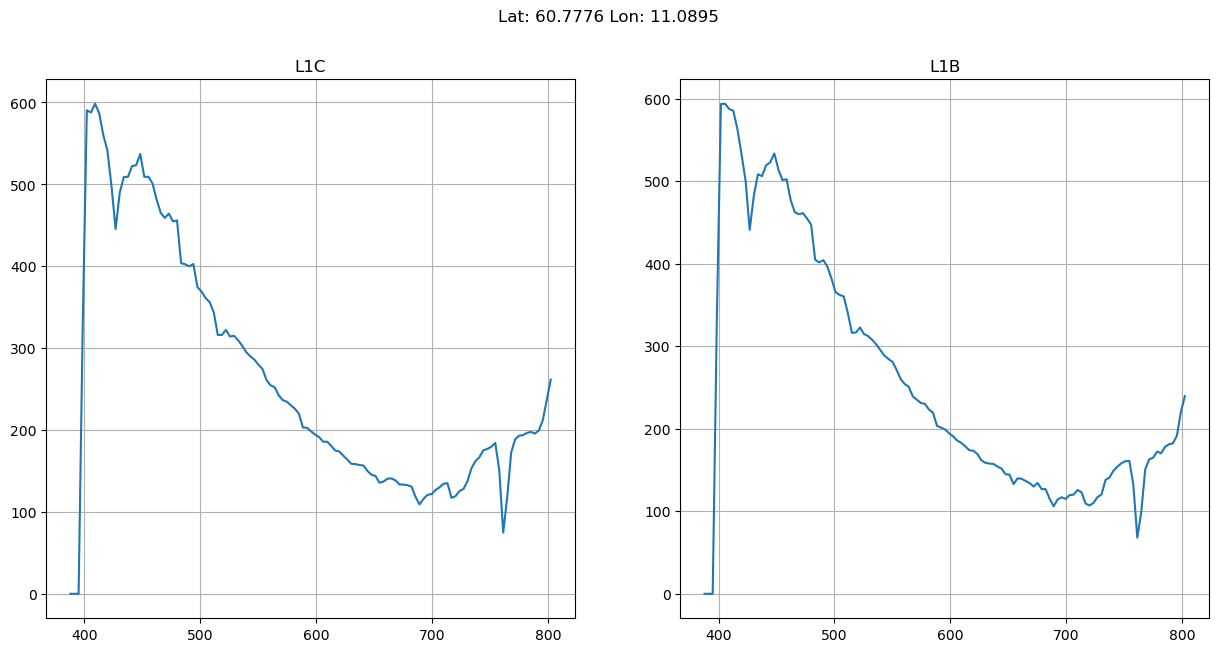

In [14]:
# Comparing Data Points
import numpy as np
import matplotlib.pyplot as plt

# Get min and max Values of Lat and Lon
print("Min Lat: ",np.nanmin(satobj.info["lat"]))
print("Max Lat: ",np.nanmax(satobj.info["lat"]))
print("Min Lon: ",np.nanmin(satobj.info["lon"]))
print("Max Lon: ",np.nanmax(satobj.info["lon"]))

print("------------------------ \n")

# Get Spectra L1C from a coordinate that is inside the values from above 
lat = 60.7776
lon = 11.0895
spectra_test1 = satobj.get_spectra([lat,lon],postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra1.csv", plot=False) # Mjosa Sandvika
spectra_test1.head()

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 7))
fig.suptitle('Lat: 60.7776 Lon: 11.0895')
val = np.array(spectra_test1)[0,4:]
ax1.plot(satobj.wavelengths,val)
ax1.set_title("L1C")
ax1.grid(True)


# Closest L1B Coordinate with Pythagoras --------------
current_lat = satobj.info["lat"]
current_lon = satobj.info["lon"]

coordinates = [c for c in zip(current_lat.flatten(),current_lon.flatten())]
xy = (lat,lon)

dist = lambda x, y: (x[0]-y[0])**2 + (x[1]-y[1])**2
closest_existing_coord = min(coordinates, key=lambda co: dist(co, xy))
found_lat = list(np.argwhere(current_lat==closest_existing_coord[0])[0])
found_lon = list(np.argwhere(current_lon==closest_existing_coord[1])[0])

found = None
if (found_lon==found_lat):
    found = found_lat

# Plot L1B Spectra
ax2.plot(satobj.wavelengths,satobj.l1b_cube[found[0],found[1],:])
ax2.set_title("L1B")
ax2.grid(True)
plt.show()
